In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text 


In [2]:
df = pd.read_csv("data/dataset.csv")

In [3]:
# inserisci all'interno della colonna Media Costo alla Vendita la media delle colonne Costo Minimo alla Vendita e Costo Massimo alla Vendita
df["Media Costo alla Vendita"] = (df["Costo Minimo alla Vendita"] + df["Costo Massimo alla Vendita"]) / 2

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 93 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

## Scatterplot per vedere la correlazione tra indice di occupazione e regione

Text(0.5, 1.0, 'Indice di occupazione per regione')

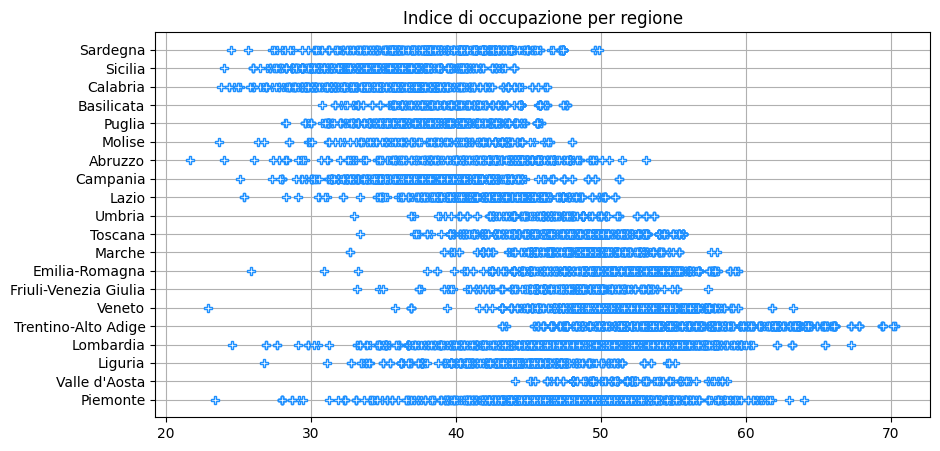

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Indice di occupazione'],df['Regione'],'P', markeredgecolor = 'dodgerblue', color='w', alpha=1) # scatterplot
plt.grid()
plt.title('Indice di occupazione per regione')



## Correlazione tra alcune variabili economiche (quelle che erano numeriche di base)

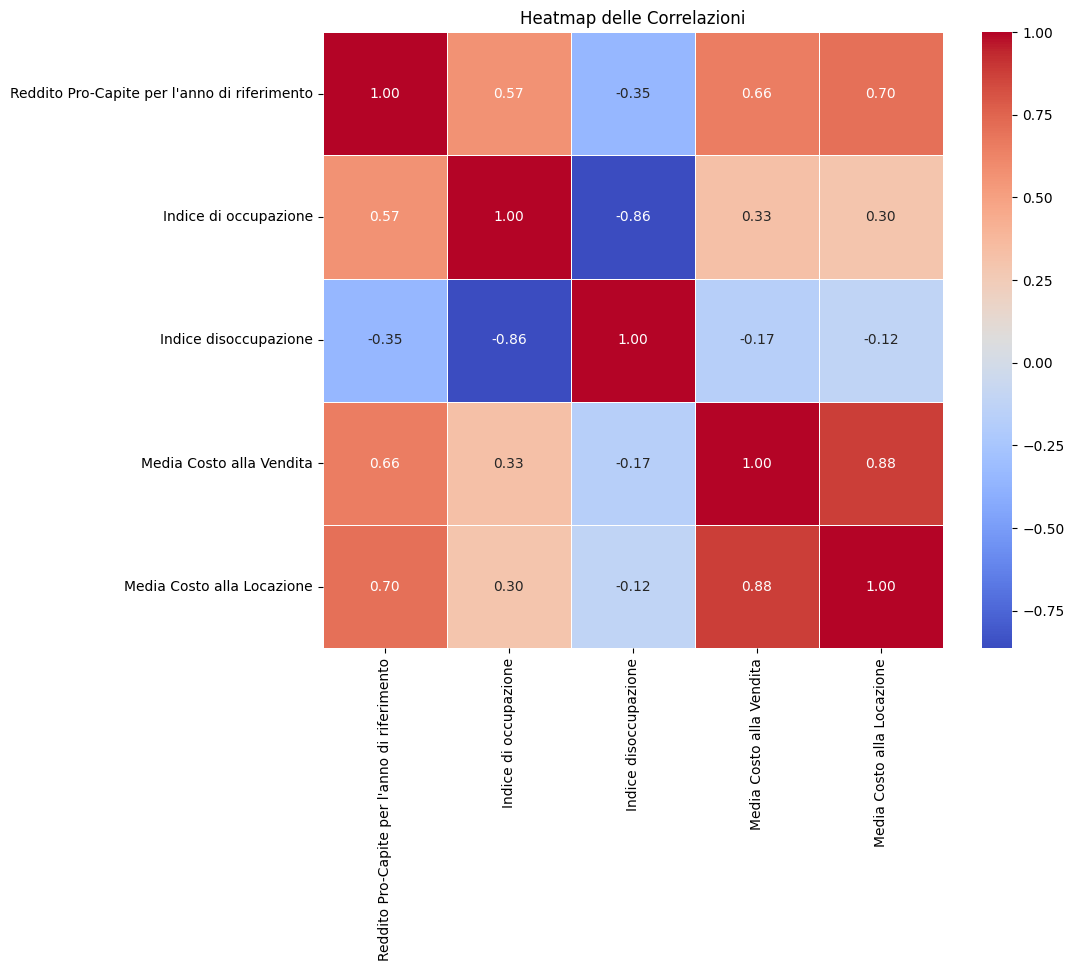

In [6]:
colonne_da_includere = ["Reddito Pro-Capite per l'anno di riferimento", "Indice di occupazione", "Indice disoccupazione", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.get_dummies(df, columns=['Descrizione Tipologia di Immobile'], drop_first=True)

# variabile dummy per i valori non numerici che volevamo analizzare

In [9]:
colonne_dummies = [col for col in df.columns if "Descrizione Tipologia di Immobile" in col]

# ripristinare una colonna eliminata con drop = 'first'  

In [10]:
df['Descrizione Tipologia di Immobile_Abitazioni civili'] = 1 - df[colonne_dummies].sum(axis=1)

In [11]:
df[colonne_dummies] = df[colonne_dummies].astype(int)


In [12]:
print(df.head())

   id_istat     id_comune    cap Provincia   Regione Ripartizione Geografica  \
0      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
1      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
2      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
3      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
4      1003  Ala di Stura  10070    Torino  Piemonte              Nord-ovest   

  id_catastale  Latitudine  Longitudine  Superficie in km2  ...  \
0         A074   45.363467     7.768606            13.2851  ...   
1         A074   45.363467     7.768606            13.2851  ...   
2         A109   44.917006     7.484504            15.7819  ...   
3         A109   44.917006     7.484504            15.7819  ...   
4         A117   45.314924     7.304367            45.7648  ...   

   Costo Massimo alla Locazione  Media Costo alla Locazione  \
0                           4.0                      

# matrice di correlazione per le tipologie di immobili e la media costo vendita e locazione

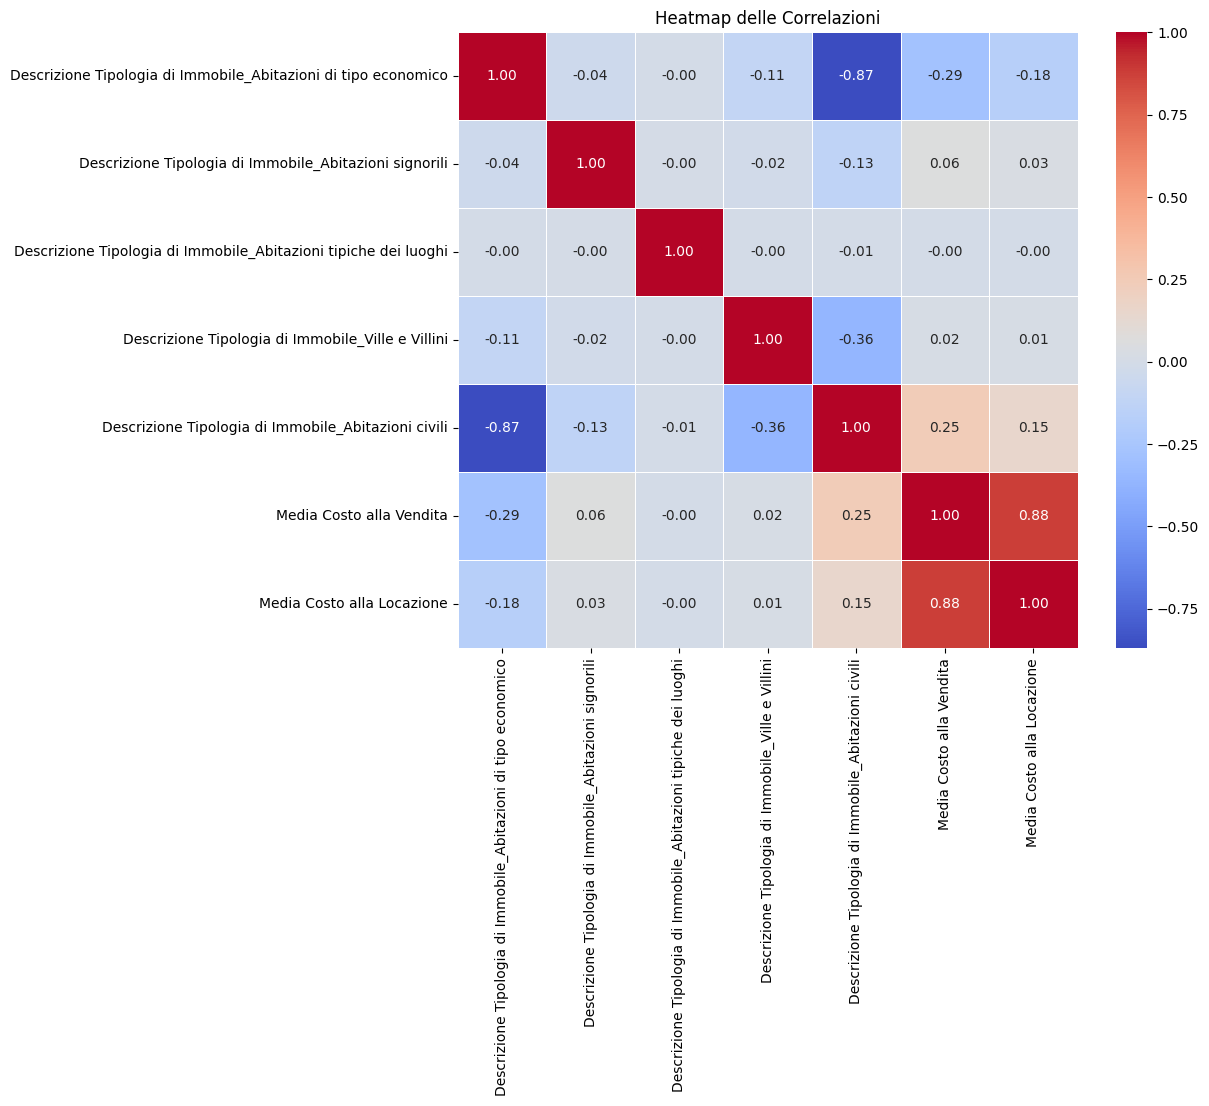

In [13]:
colonne_da_includere_2 = ["Descrizione Tipologia di Immobile_Abitazioni di tipo economico", "Descrizione Tipologia di Immobile_Abitazioni signorili", "Descrizione Tipologia di Immobile_Abitazioni tipiche dei luoghi", "Descrizione Tipologia di Immobile_Ville e Villini", "Descrizione Tipologia di Immobile_Abitazioni civili", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere_2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()

# Divisioni delle Regioni per Macroarea

In [14]:
regioni_nord = ['Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige', 'Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna']
regioni_centro = ['Toscana', 'Umbria', 'Marche', 'Lazio']
regioni_sud = ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria']
regioni_isole = ['Sicilia', 'Sardegna']

def assegna_ripartizione(regione):
    if regione in regioni_nord:
        return 'Nord'
    elif regione in regioni_centro:
        return 'Centro'
    elif regione in regioni_sud:
        return 'Sud'
    elif regione in regioni_isole:
        return 'Isole'
    else:
        return 'Sconosciuto'

df['Macroarea'] = df['Regione'].apply(assegna_ripartizione)

df[['Regione', 'Macroarea']].head()


,Regione,Macroarea
0,Piemonte,Nord
1,Piemonte,Nord
2,Piemonte,Nord
3,Piemonte,Nord
4,Piemonte,Nord


In [15]:
df.columns

Index(['id_istat', 'id_comune', 'cap', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Latitudine', 'Longitudine',
       'Superficie in km2', 'Indice di spopolamento', 'Codice regione',
       'Capoluogo_enc', 'Reddito Pro-Capite per l'anno di riferimento',
       'Codice comuni', 'Esercizi a 5 stelle', 'Letti', 'Camere', 'Bagni',
       'Esercizi a 4 stelle', 'Letti.1', 'Camere.1', 'Bagni.1',
       'Esercizi a 3 stelle', 'Letti.2', 'Camere.2', 'Bagni.2',
       'Esercizi a 2 stelle', 'Letti.3', 'Camere.3', 'Bagni.3',
       'Esercizi a 1 stella', 'Letti.4', 'Camere.4', 'Bagni.4',
       'Esercizi turistico-alberghiere', 'Letti.5', 'Camere.5', 'Bagni.5',
       'Esercizi alberghieri', 'Letti.6', 'Camere.6', 'Bagni.6',
       'Numero campeggi e villaggi turistici', 'Letti.7',
       'Numero di alloggi in affitto gestiti in forma imprenditoriale',
       'Letti.8', 'Numero di agriturismi', 'Letti.9',
       'Numero di ostelli per la gioventù', 'Letti.10',
   

# Calcolo delle medie di alcune delle variabili economiche/sociali divise per Macroaree

In [16]:
df.groupby('Macroarea')[["Reddito Pro-Capite per l'anno di riferimento", 'Indice di occupazione', 'Indice disoccupazione']].mean()


,Reddito Pro-Capite per l'anno di riferimento,Indice di occupazione,Indice disoccupazione
Macroarea,,,
Centro,25.349882,47.315307,12.581153
Isole,18.438381,35.857146,25.056770
Nord,24.175388,49.572173,9.187589
Sud,17.594083,38.043390,19.475348


# Rappresentazioni grafiche

C:\Users\silvi\AppData\Local\Temp\ipykernel_10728\1636255058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Macroarea', y="Reddito Pro-Capite per l'anno di riferimento", data=df, palette='coolwarm')


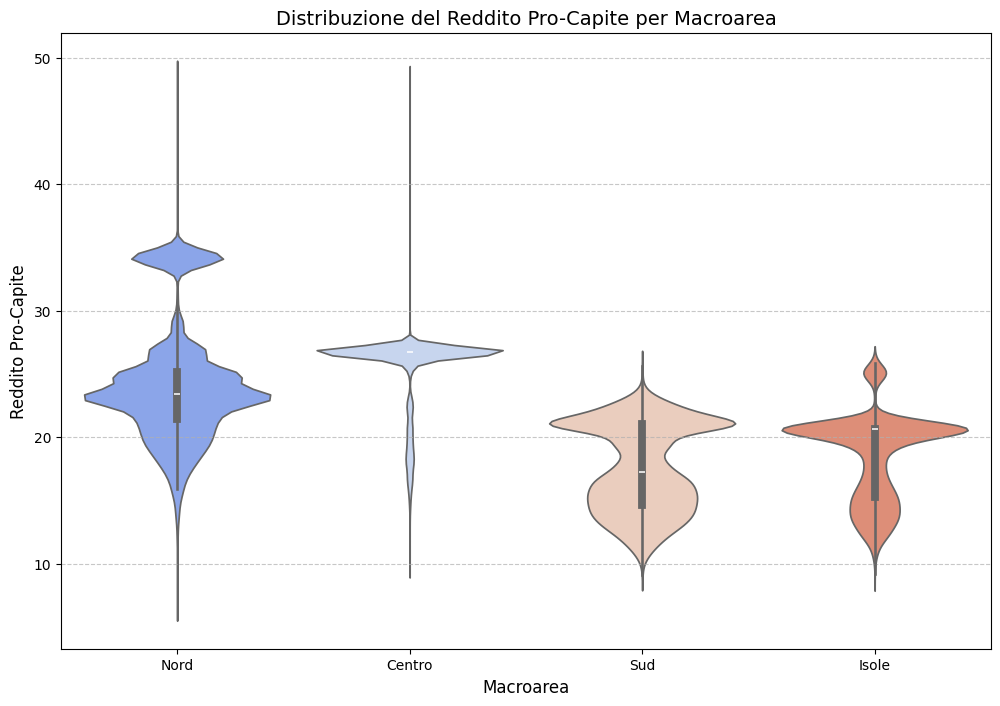

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Macroarea', y="Reddito Pro-Capite per l'anno di riferimento", data=df, palette='coolwarm')

plt.title('Distribuzione del Reddito Pro-Capite per Macroarea', fontsize=14)
plt.xlabel('Macroarea', fontsize=12)
plt.ylabel('Reddito Pro-Capite', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


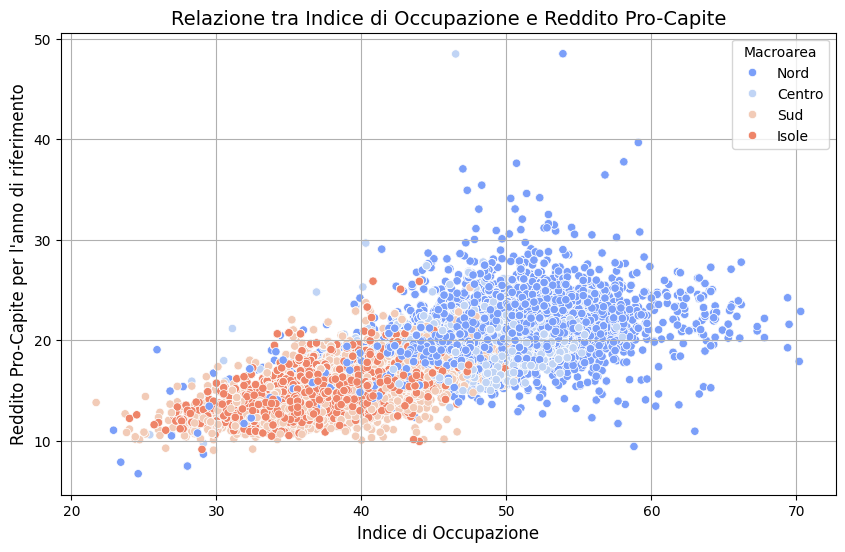

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Indice di occupazione", y="Reddito Pro-Capite per l'anno di riferimento", hue="Macroarea", data=df, palette="coolwarm")

plt.title("Relazione tra Indice di Occupazione e Reddito Pro-Capite", fontsize=14)
plt.xlabel("Indice di Occupazione", fontsize=12)
plt.ylabel("Reddito Pro-Capite per l'anno di riferimento", fontsize=12)
plt.legend(title="Macroarea")
plt.grid(True)
plt.show()


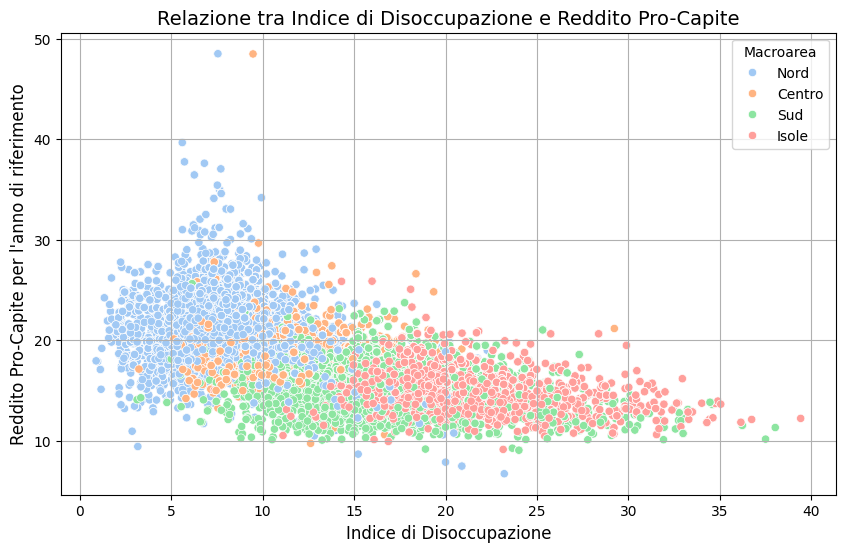

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Indice disoccupazione", y="Reddito Pro-Capite per l'anno di riferimento", hue="Macroarea", data=df, palette="pastel")

plt.title("Relazione tra Indice di Disoccupazione e Reddito Pro-Capite", fontsize=14)
plt.xlabel("Indice di Disoccupazione", fontsize=12)
plt.ylabel("Reddito Pro-Capite per l'anno di riferimento", fontsize=12)
plt.legend(title="Macroarea")
plt.grid(True)
plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 98 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

In [21]:
color_blue = "deepskyblue"
color_green = "mediumseagreen"
color_pink = "hotpink"
color_yellow = "gold"
color_purple = "mediumorchid"
color_orange = "darkorange"
color_mint = "mediumaquamarine"
color_lavender = "blueviolet"
color_sky = "cadetblue"
color_rose = "lightcoral"
color_red = "indianred"
color_black = "black"
color_white = "white"


## PCA su variabili economiche e PCA su variabili turistiche 

In [22]:
# andiamo a selezionare le colonne che ci interessano
var_economiche = df[["Reddito Pro-Capite per l'anno di riferimento", "Reddito da fabbricati - Frequenza", "Reddito da lavoro dipendente e assimilati - Frequenza", "Reddito da pensione - Frequenza", "Reddito da lavoro autonomo (comprensivo dei valori nulli) - Frequenza", "Reddito di spettanza dell'imprenditore in contabilita' ordinaria  (comprensivo dei valori nulli) - Frequenza", "Reddito di spettanza dell'imprenditore in contabilita' semplificata (comprensivo dei valori nulli) - Frequenza", "Reddito complessivo minore o uguale a zero euro - Frequenza", "Reddito complessivo da 0 a 10000 euro - Frequenza", "Reddito complessivo da 10000 a 15000 euro - Frequenza", "Reddito complessivo da 15000 a 26000 euro - Frequenza", "Reddito complessivo da 26000 a 55000 euro - Frequenza", "Reddito complessivo da 55000 a 75000 euro - Frequenza", "Reddito complessivo da 75000 a 120000 euro - Frequenza", "Reddito complessivo oltre 120000 euro - Frequenza"]]

# Rinominare le colonne con nomi più corti
short_names = [
    "Reddito_ProCapite", "Reddito_Fabbricati", "Reddito_LavoroDip", "Reddito_Pensione",
    "Reddito_LavoroAut", "Reddito_ImpresaOrd", "Reddito_ImpresaSemp", "Reddito_Zero",
    "Reddito_0_10k", "Reddito_10k_15k", "Reddito_15k_26k", "Reddito_26k_55k",
    "Reddito_55k_75k", "Reddito_75k_120k", "Reddito_120k_Plus"
]
var_economiche.columns = short_names

# Controllare la presenza di valori NaN
nan_summary = var_economiche.isna().sum()
print("Valori NaN per colonna:")
print(nan_summary)


Valori NaN per colonna:
Reddito_ProCapite      0
Reddito_Fabbricati     0
Reddito_LavoroDip      0
Reddito_Pensione       0
Reddito_LavoroAut      0
Reddito_ImpresaOrd     0
Reddito_ImpresaSemp    0
Reddito_Zero           0
Reddito_0_10k          0
Reddito_10k_15k        0
Reddito_15k_26k        0
Reddito_26k_55k        0
Reddito_55k_75k        0
Reddito_75k_120k       0
Reddito_120k_Plus      0
dtype: int64


In [23]:
# andiamo ad impostare lo scaler che serve per standardizzare i dati
scaler = StandardScaler()

In [24]:
cols = var_economiche.columns

# Standardize the data
df_standardized = scaler.fit_transform(var_economiche)
df_standardized = pd.DataFrame(df_standardized, columns=cols) #Ricreo df perchè lo scaler restituisce array
df_standardized.head()

,Reddito_ProCapite,Reddito_Fabbricati,Reddito_LavoroDip,Reddito_Pensione,Reddito_LavoroAut,Reddito_ImpresaOrd,Reddito_ImpresaSemp,Reddito_Zero,Reddito_0_10k,Reddito_10k_15k,Reddito_15k_26k,Reddito_26k_55k,Reddito_55k_75k,Reddito_75k_120k,Reddito_120k_Plus
0,-0.115961,-0.837997,-0.845563,-0.858276,-0.825738,-0.861733,-0.894737,-0.817404,-0.843184,-0.857749,-0.880495,-0.836700,-0.813017,-0.813848,-0.80777
1,-0.115961,-0.837997,-0.845563,-0.858276,-0.825738,-0.861733,-0.894737,-0.817404,-0.843184,-0.857749,-0.880495,-0.836700,-0.813017,-0.813848,-0.80777
2,-0.500949,-0.836886,-0.844376,-0.857775,-0.826343,-0.860791,-0.894122,-0.817404,-0.842819,-0.856501,-0.878927,-0.835723,-0.812887,-0.813940,-0.80879
3,-0.500949,-0.836886,-0.844376,-0.857775,-0.826343,-0.860791,-0.894122,-0.817404,-0.842819,-0.856501,-0.878927,-0.835723,-0.812887,-0.813940,-0.80879
4,-0.206705,-0.839786,-0.847345,-0.860747,-0.826894,-0.865504,-0.897735,-0.817404,-0.844754,-0.859627,-0.883610,-0.838527,-0.814557,-0.814494,-0.80879


In [25]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized)
# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)

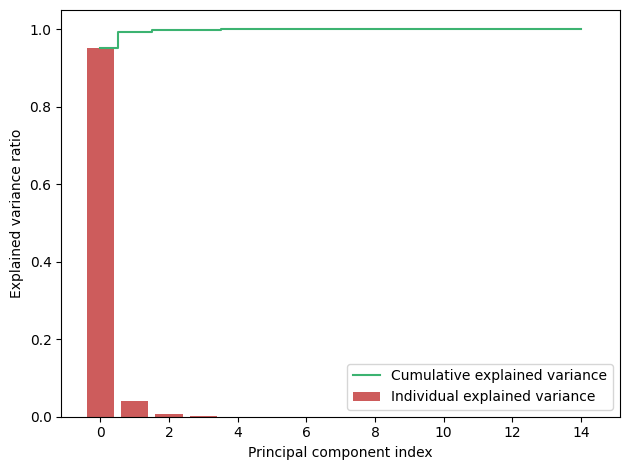

In [26]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color=color_red)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_green)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Con la prima variabile praticamente spieghiamo 95% della varianza del dataset 

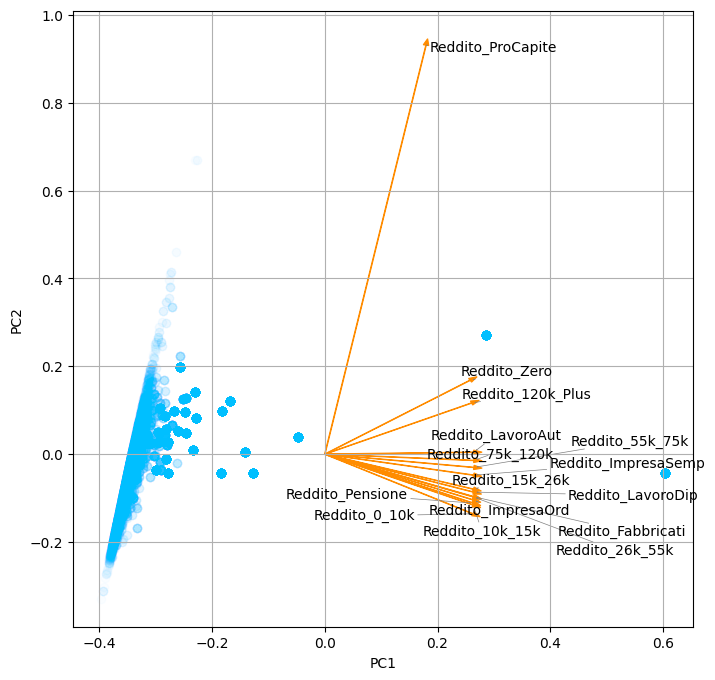

In [27]:
# Define a plot function
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(8, 8))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.02, color=color_blue)
    
    texts = []
    multplier = 1.0
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=color_orange, alpha=1, lw=0.8, head_width=0.01)
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, labels[i], color=color_black, ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Use only the 2 PCs.
myplot(x_new[:, 0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

Minimum number of components to explain 80.0% of variance: 1


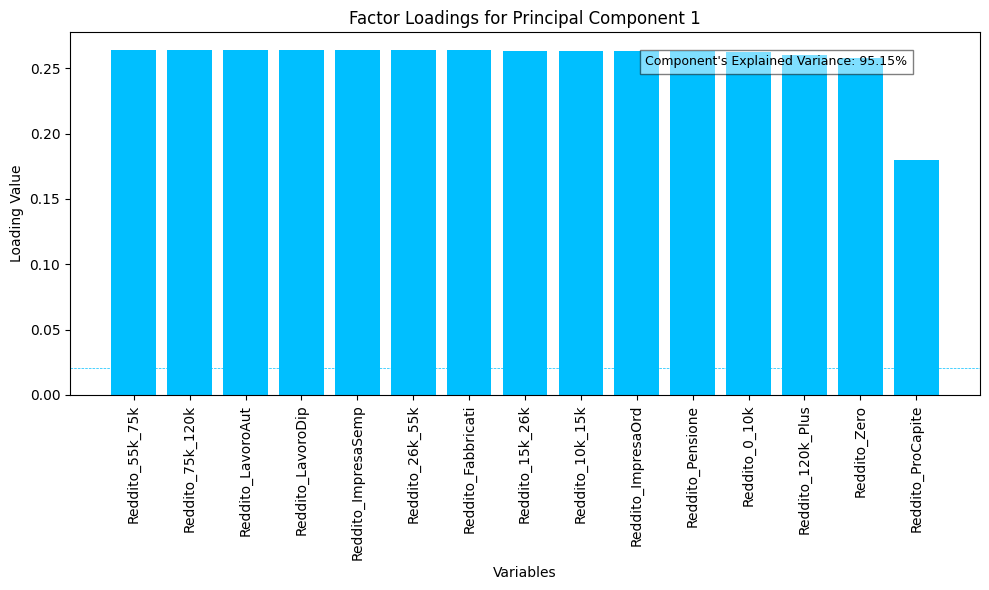

Minimum number of components to explain 80.0% of variance: 1


In [28]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')
loadings = pca.components_.T
# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = [color_blue if abs(loading) >= std_loading else color_yellow for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)
    
    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor=color_white, alpha=0.5))
    plt.tight_layout()
    plt.show()
    
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 98 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

In [30]:
df = pd.get_dummies(df, columns= ['Tipo di località'])

In [32]:
df.columns

Index(['id_istat', 'id_comune', 'cap', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Latitudine', 'Longitudine',
       'Superficie in km2',
       ...
       'Macroarea',
       'Tipo di località_Altri comuni non altrimenti classificati',
       'Tipo di località_Capoluogo senza specifici interessi turistici',
       'Tipo di località_Città d'Arte', 'Tipo di località_Località collinari',
       'Tipo di località_Località lacuali', 'Tipo di località_Località marine',
       'Tipo di località_Località montane',
       'Tipo di località_Località religiose',
       'Tipo di località_Località termali'],
      dtype='object', length=106)

## PCA VARIBILI TURISTICHE

In [40]:
# andiamo a selezionare le colonne che ci interessano
var_turistiche = df[['Esercizi a 5 stelle', 'Letti', 'Camere', 'Bagni', 'Esercizi a 4 stelle', 'Letti.1', 'Camere.1', 'Bagni.1', 'Esercizi a 3 stelle', 'Letti.2', 'Camere.2', 'Bagni.2', 'Esercizi a 2 stelle', 'Letti.3', 'Camere.3', 'Bagni.3', 'Esercizi a 1 stella', 'Letti.4', 'Camere.4', 'Bagni.4', 'Esercizi turistico-alberghiere', 'Letti.5', 'Camere.5', 'Bagni.5', 'Esercizi alberghieri', 'Letti.6', 'Camere.6', 'Bagni.6', 'Numero campeggi e villaggi turistici', 'Letti.7', 'Numero di alloggi in affitto gestiti in forma imprenditoriale', 'Letti.8', 'Numero di agriturismi', 'Letti.9', 'Numero di ostelli per la gioventù', 'Letti.10', 'Numero di case per ferie', 'Letti.11', 'Numero di rifugi alpini', 'Letti.12', 'Numero di altri esercizi ricettivi', 'Letti.13', 'Numero di b&b', 'Letti.14', 'Numero di esercizi extra-alberghieri', 'Letti.15', 'Numero', 'Letti.16']]


# Controllare la presenza di valori NaN
nan_summary = var_turistiche.isna().sum()
print("Valori NaN per colonna:")
print(nan_summary)


Valori NaN per colonna:
Esercizi a 5 stelle                                              0
Letti                                                            0
Camere                                                           0
Bagni                                                            0
Esercizi a 4 stelle                                              0
Letti.1                                                          0
Camere.1                                                         0
Bagni.1                                                          0
Esercizi a 3 stelle                                              0
Letti.2                                                          0
Camere.2                                                         0
Bagni.2                                                          0
Esercizi a 2 stelle                                              0
Letti.3                                                          0
Camere.3                              

In [41]:
cols2 = var_turistiche.columns

# Standardize the data
df_standardized2 = scaler.fit_transform(var_turistiche)
df_standardized2 = pd.DataFrame(df_standardized2, columns=cols2) #Ricreo df perchè lo scaler restituisce array
df_standardized2.head()

,Esercizi a 5 stelle,Letti,Camere,Bagni,Esercizi a 4 stelle,Letti.1,Camere.1,Bagni.1,Esercizi a 3 stelle,Letti.2,...,Numero di rifugi alpini,Letti.12,Numero di altri esercizi ricettivi,Letti.13,Numero di b&b,Letti.14,Numero di esercizi extra-alberghieri,Letti.15,Numero,Letti.16
0,-0.760285,-0.486942,-0.493127,-0.492311,-0.76764,-0.462087,-0.433579,-0.434233,-0.774383,-0.444592,...,-0.148153,-0.108269,-0.323075,-0.314027,-0.570403,-0.497315,-0.526378,-0.112006,-0.521028,-0.348028
1,-0.760285,-0.486942,-0.493127,-0.492311,-0.76764,-0.462087,-0.433579,-0.434233,-0.774383,-0.444592,...,-0.148153,-0.108269,-0.323075,-0.314027,-0.570403,-0.497315,-0.526378,-0.112006,-0.521028,-0.348028
2,-0.760285,-0.486942,-0.493127,-0.492311,-0.76764,-0.462087,-0.433579,-0.434233,-0.774383,-0.444592,...,-0.148153,-0.108269,-0.323075,-0.314027,-0.610881,-0.595495,-0.566131,-0.538017,-0.562474,-0.764691
3,-0.760285,-0.486942,-0.493127,-0.492311,-0.76764,-0.462087,-0.433579,-0.434233,-0.774383,-0.444592,...,-0.148153,-0.108269,-0.323075,-0.314027,-0.610881,-0.595495,-0.566131,-0.538017,-0.562474,-0.764691
4,-0.760285,-0.486942,-0.493127,-0.492311,-0.76764,-0.462087,-0.433579,-0.434233,-0.764285,0.048840,...,-0.148153,-0.108269,-0.323075,-0.314027,-0.600761,-0.577644,-0.557297,-0.118365,-0.539449,0.304950


In [42]:
# Fit the PCA
pca = PCA(n_components=df_standardized2.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized2)
# Transform the data
x_new_cols = df_standardized2.columns
x_new = pca.fit_transform(df_standardized2)

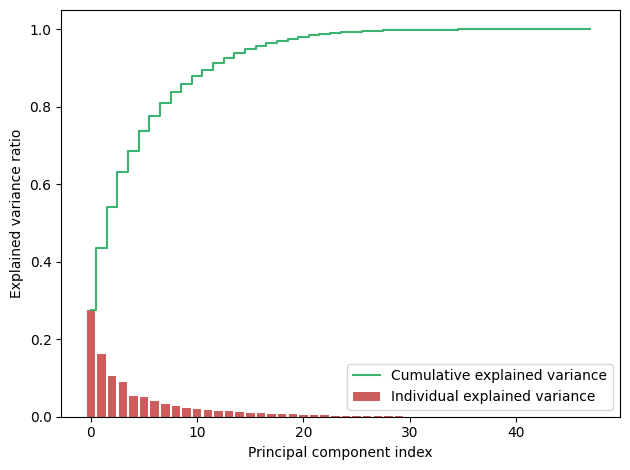

In [43]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color=color_red)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_green)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

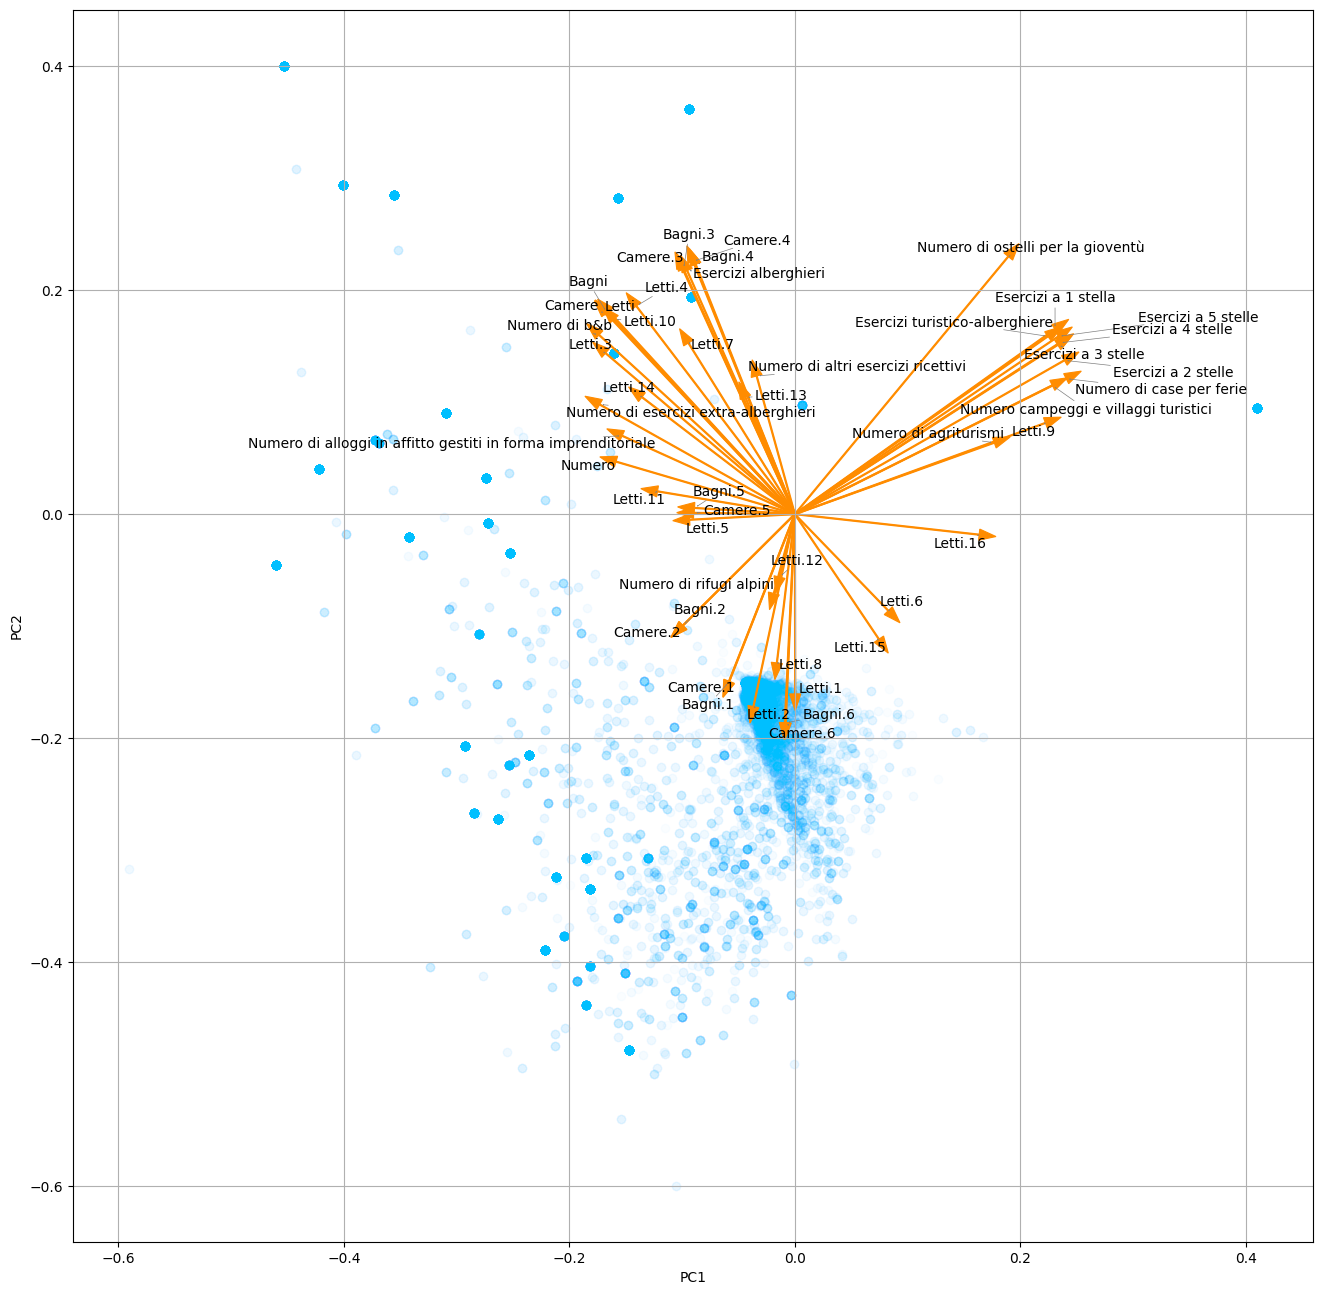

In [44]:
# Define a plot function
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(16,16))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.02, color=color_blue)
    
    texts = []
    multplier = 1.0
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=color_orange, alpha=1, lw=0.8, head_width=0.01)
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, labels[i], color=color_black, ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Use only the 2 PCs.
myplot(x_new[:, 0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

Minimum number of components to explain 80.0% of variance: 8


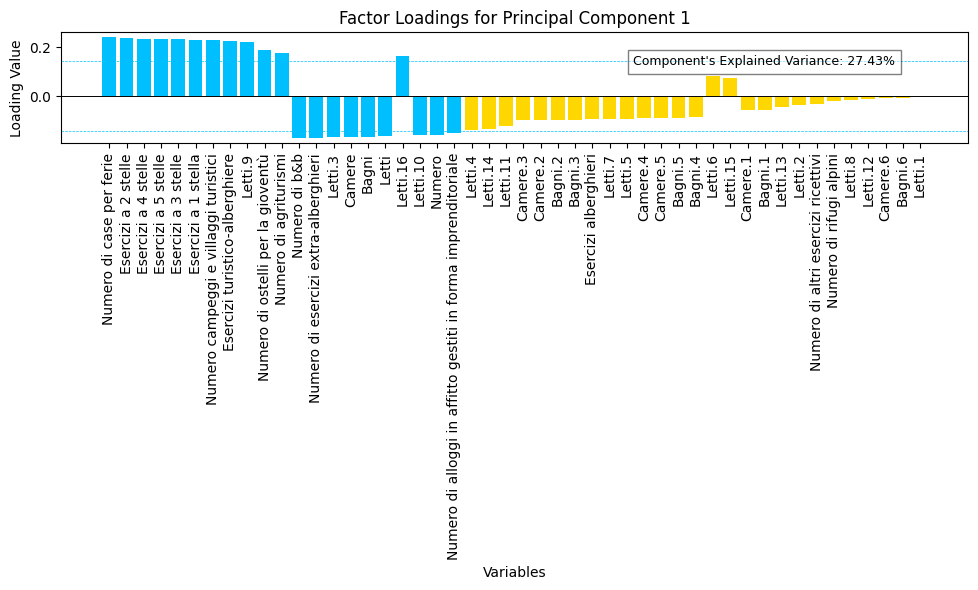

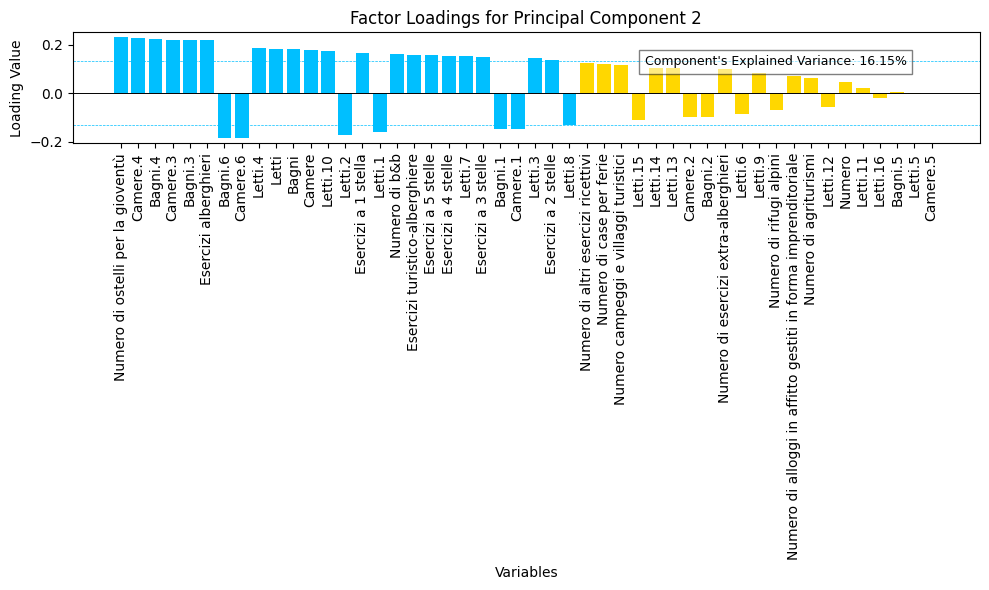

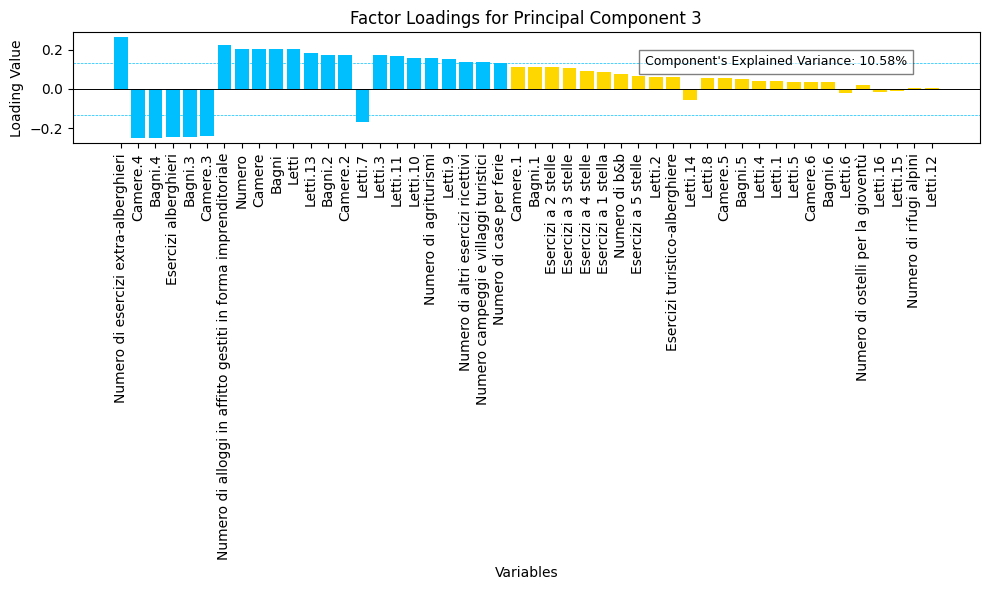

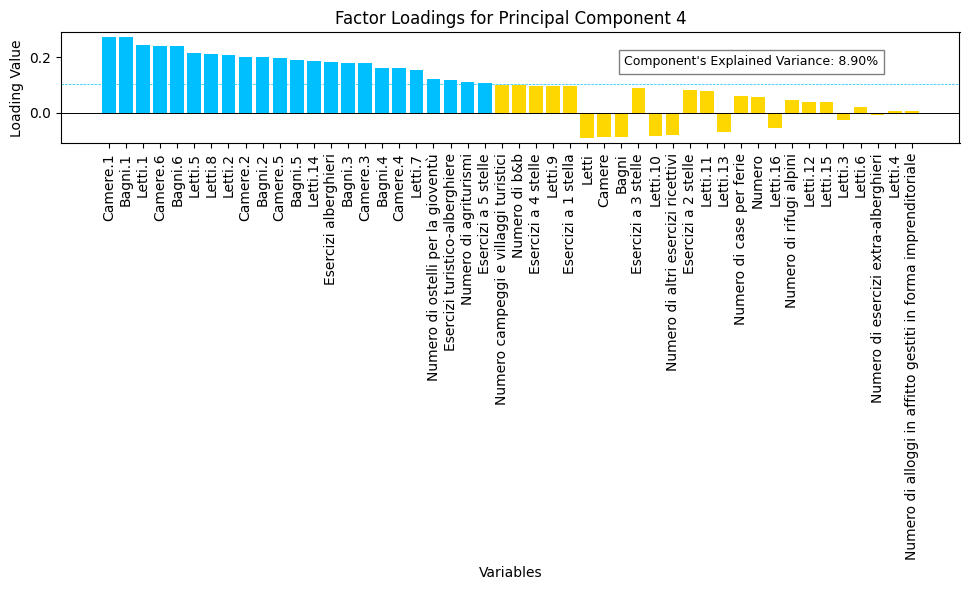

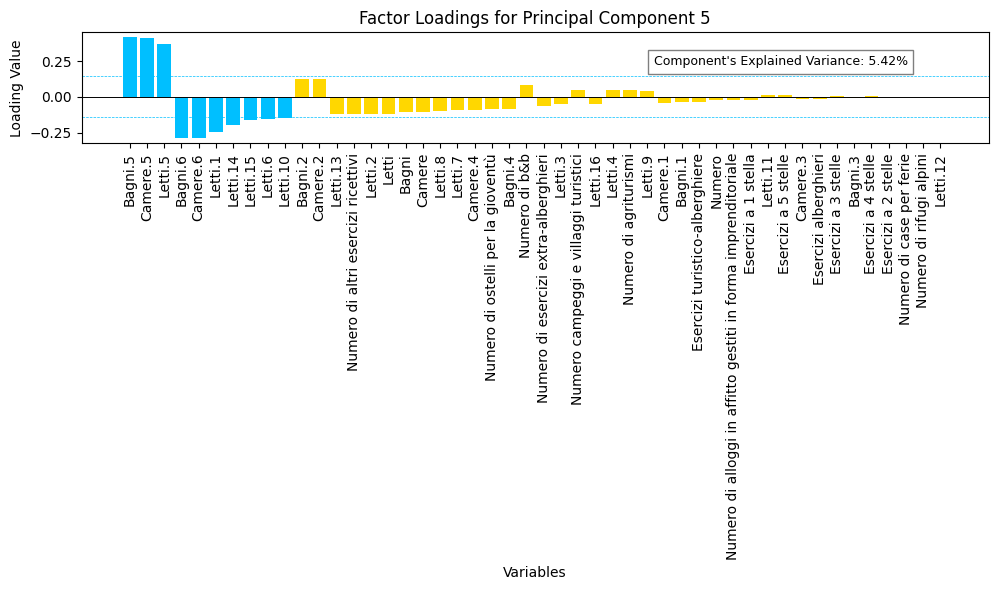

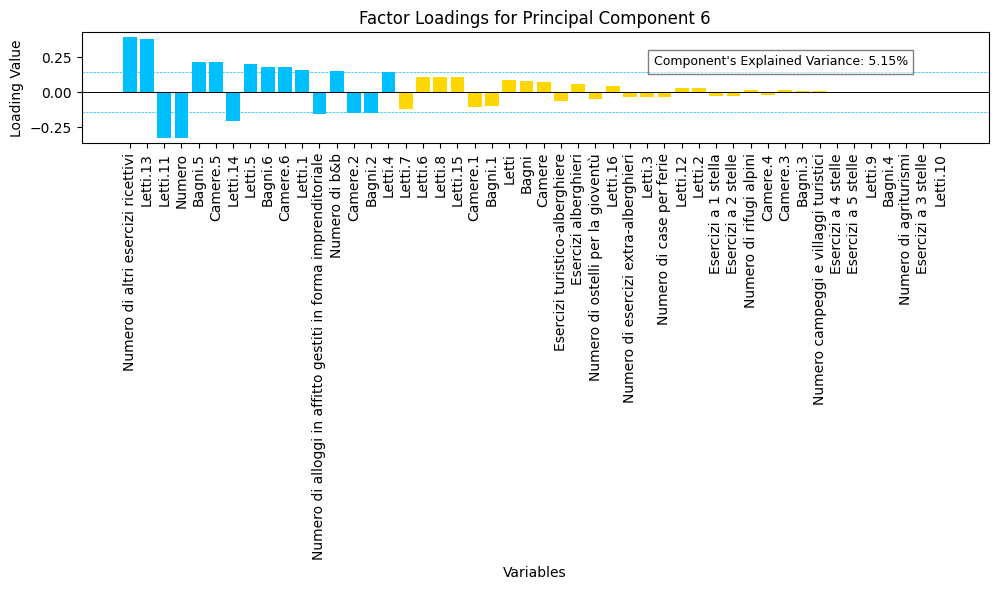

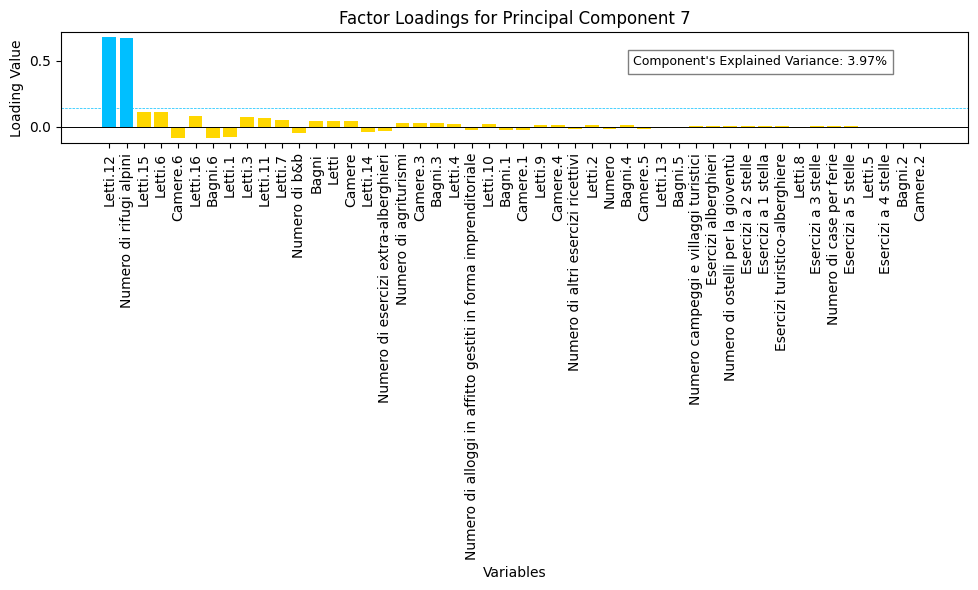

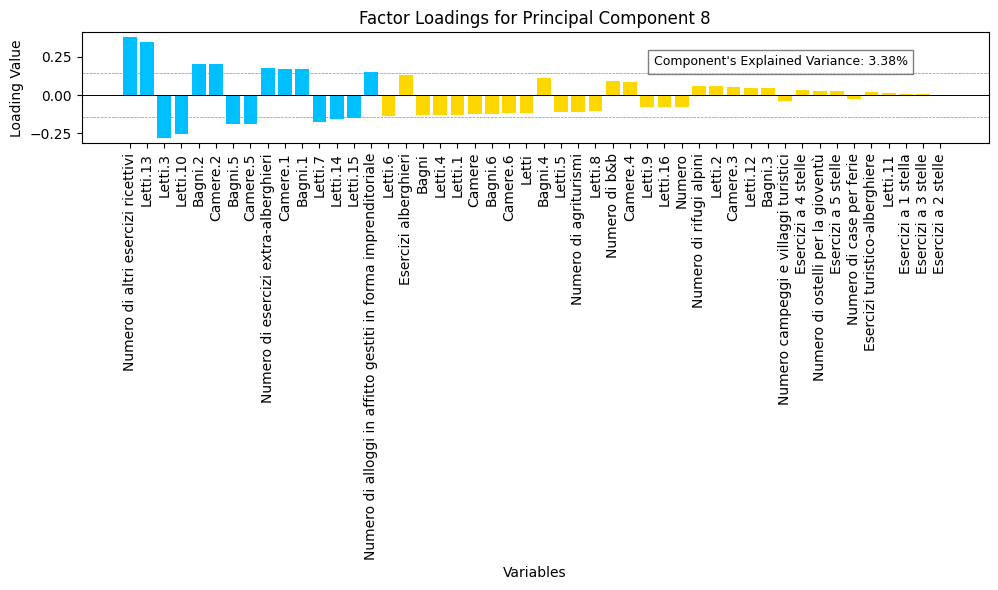

Minimum number of components to explain 80.0% of variance: 8


In [45]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')
loadings = pca.components_.T
# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = [color_blue if abs(loading) >= std_loading else color_yellow for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)
    
    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor=color_white, alpha=0.5))
    plt.tight_layout()
    plt.show()
    
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

## Visulizzazione valori PRIMA componente principale

In [60]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc1': x_new[:,0]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc1', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 1:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 1:
      id_comune  score_pc1
26797      Roma   5.209499
26798      Roma   5.209499
26799      Roma   5.209499
26800      Roma   5.209499
26801      Roma   5.209499
26802      Roma   5.209499
26803      Roma   5.209499
26805      Roma   5.209499
26806      Roma   5.209499
26807      Roma   5.209499


## Visulizzazione valori SECONDA componente principale

In [61]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc2': x_new[:,1]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc2', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 2:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 2:
      id_comune  score_pc2
44379    Napoli   5.123285
44396    Napoli   5.123285
44397    Napoli   5.123285
44398    Napoli   5.123285
44399    Napoli   5.123285
44384    Napoli   5.123285
44385    Napoli   5.123285
44370    Napoli   5.123285
44387    Napoli   5.123285
44413    Napoli   5.123285


## Visulizzazione valori TERZA componente principale

In [62]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc3': x_new[:,2]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc3', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 3:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 3:
               id_comune  score_pc3
17313  Cortina d'Ampezzo   7.053550
17312  Cortina d'Ampezzo   7.053550
17311  Cortina d'Ampezzo   7.053550
15096             Merano   5.958736
15092             Merano   5.958736
15098             Merano   5.958736
15100             Merano   5.958736
15097             Merano   5.958736
15093             Merano   5.958736
15101             Merano   5.958736


## Visulizzazione valori QUARTA componente principale

In [63]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc4': x_new[:,3]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc4', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 4:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 4:
              id_comune  score_pc4
14989  Corvara in Badia   8.205984
14987  Corvara in Badia   8.205984
14986  Corvara in Badia   8.205984
14988  Corvara in Badia   8.205984
49461         Favignana   7.166917
49458         Favignana   7.166917
49462         Favignana   7.166917
49459         Favignana   7.166917
49457         Favignana   7.166917
49460         Favignana   7.166917


## Visulizzazione valori QUINTA componente principale

In [64]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc5': x_new[:,4]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc5', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 5:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 5:
      id_comune  score_pc5
22911   Ravenna   8.358758
22994   Ravenna   8.358758
22931   Ravenna   8.358758
22932   Ravenna   8.358758
22917   Ravenna   8.358758
22923   Ravenna   8.358758
22924   Ravenna   8.358758
22912   Ravenna   8.358758
22913   Ravenna   8.358758
22918   Ravenna   8.358758


## Visulizzazione valori SESTA componente principale

In [65]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc6': x_new[:,5]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc6', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 6:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 6:
            id_comune  score_pc6
12207  Pieve Emanuele   6.366538
12208  Pieve Emanuele   6.366538
12205  Pieve Emanuele   6.366538
12206  Pieve Emanuele   6.366538
42420       Terracina   5.923678
42399       Terracina   5.923678
42406       Terracina   5.923678
42407       Terracina   5.923678
42400       Terracina   5.923678
42419       Terracina   5.923678


## Visulizzazione valori SETTIMA componente principale

In [66]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc7': x_new[:,6]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc7', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 7:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 7:
               id_comune  score_pc7
3413             Vinadio  45.840227
3416             Vinadio  45.840227
3414             Vinadio  45.840227
3415             Vinadio  45.840227
17313  Cortina d'Ampezzo  40.119993
17311  Cortina d'Ampezzo  40.119993
17312  Cortina d'Ampezzo  40.119993
3880          Courmayeur  39.167338
3886          Courmayeur  39.167338
3879          Courmayeur  39.167338


## Visulizzazione valori OTTAVA componente principale

In [67]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc8': x_new[:,7]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc8', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 8:")
print(comuni_scores_ordinati.head(10))

Comuni con i punteggi più alti nella Componente Principale 8:
               id_comune  score_pc8
17311  Cortina d'Ampezzo   5.379074
17313  Cortina d'Ampezzo   5.379074
17312  Cortina d'Ampezzo   5.379074
42318           Minturno   4.581687
42319           Minturno   4.581687
42317           Minturno   4.581687
42316           Minturno   4.581687
42315           Minturno   4.581687
42314           Minturno   4.581687
42322           Minturno   4.581687
